# Data Visualization: Ford Go Bike 

by **Zakariya Boutayeb**

- Introduction
- I. Data Wrangling
- II. Univariate Exploration
- III. Bivariate Exploration
- IV. Multivariate Exploration
- V. Proposal for the next step


## Introduction:

Implemented in August 2013, Ford GoBike is the first bike-sharing system introduced in the San Francisco Bay Area, California. Ford GoBike system had over 7,000 bicycles in 540 stations across across San Francisco, East Bay and San Jose.  On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. Lyft acquired and rebranded the service in 2019. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase an access pass. 

**What is the structure of your dataset?**

Ford GoBike System Data includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The data includes: Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

**What is/are the main feature(s) of interest in your dataset?**

Our data analysis process for this project will provide a step by step guidance, starting by asking a series of questions, then wrangling and exploring the dataset, and finally drawing some conclusions as well as communicating the findings.

- Where do Ford GoBike Bikers ride? 
- How long does the average trip take?
- Which stations are most popular? 
- What time of day and days of the week are most rides taken on? 
- Does the above depend on if a user is a subscriber or customer?

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

I would say that the duration, day of the week, time, and location information will help me the most.

We are going to use Python visualization libraries, including matplotlib and seaborn, to systematically explore Ford GoBike System Data dataset, starting from plots of single variables and building up to plots of multiple variables. Then, we are going to produce a presentation that illustrates interesting properties, trends, and relationships that will be discovered in the dataset.

## I. Data Wrangling: 

Before we can start with the exploratory data analysis through visualizations, our first step in data wrangling process is gathering data. 

### Step 1: Gathering Data:

In [1371]:
#Import all necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import calendar
import math
import datetime as dt

%matplotlib inline

In [1372]:
# Display Ford GoBike csv file 
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Step 2. Assessing Data:

After having gathered data, the next step is to assess the datset visually and programmatically to identify data quality issues as well as tidiness issues.

In [1373]:
# Display first rows of the dataframe
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [1374]:
# Display last rows of the dataframe
df.tail()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No
183411,271,2019-02-01 00:00:20.6360,2019-02-01 00:04:52.0580,24.0,Spear St at Folsom St,37.789677,-122.390428,37.0,2nd St at Folsom St,37.785000,-122.395936,1057,Subscriber,1989.0,Male,No


In [1375]:
# view the dimension of the dataset
df.shape

(183412, 16)

The dataset explores the Ford GoBike's trip data for public containing approximately 183,412 bike rides on february, 2019.

In [1376]:
# View info of DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [1377]:
# Check for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

There are 197 missing values for both start_station_id and start_station_name, and also for end_station_id and end_station_name. While there are 8265 missing values for both member_birth_year  and member_gender.

In [1378]:
# Check for duplicated data
df.duplicated().sum()

0

In [1379]:
# display statistic basic summary 
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [1380]:
# Display the number of bikes in the dataset
df.bike_id.nunique()

4646

In [1381]:
# Check the number of customer and subscriber
df.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

**Quality issues:**

- **Q 1:** Missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name and also member_birth_year and member_gender.
- **Q 2:** Drop columns: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip
- **Q 3:** start_time and end_time should be datetime64 dtype instead of objects
- **Q 4:** There are two variables in one column which violates the "each variable forms a column" requirement. 
- **Q 5:** user_type, member_gender and bike_share_for_all_trip can be set to category instead of objects
- **Q 6:** bike id can be set to object instead of dtype int64    
- **Q 7:**  member_birth_year should be set to int64 instead of dtype float64  
- **Q 8:** For further analysis, a new column of age group should be created as well as another one for duration in minutes 

### Step 3. Cleaning Data:

Data cleaning is the third step in data wrangling process. This entails formatting the columns into appropriate data types and extracting essential data. First, I will isolate the hour and day of the week from start_time for visualizing bike usage over time. In addition, I will convert member_birth_year into member_age and group_age. Moreover, I will convert duration_sec into duration_min. Finally, I will reorder the column placement for better readability and analysis.

In [1382]:
#create copy of original dataframe
df_clean = df.copy()

In [1383]:
df_clean.shape

(183412, 16)

Programmatic data cleaning as its own separate process within data wrangling has 3 steps: **defining**, **coding** and **testing**. First of all, we'll define cleaning data plan in writing, then we'll translate it into code, and finally, we'll test the dataset often using code to make sure the cleaning code worked.

**Q 1:** Missing values in columns: start_station_id, start_station_name, end_station_id, end_station_name and also member_birth_year and member_gender.

**Define:** Replace null values with NAN and rows with NaN values from our dataset

**Code:**

In [1384]:
# replace null values with NAN
df_clean = df_clean.replace(0, np.NAN)

# drop all NAN's rows from our dataset
df_clean = df_clean.dropna()
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No


**Test:**


In [1385]:
# Check for missing values
df_clean.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**Q 2:** Drop columns: start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude, and bike_share_for_all_trip

**Define:** Remove columns that won't be used for analysis using drop() method

**Code:**

In [1386]:
# Drop unecessary columns
df_clean = df_clean.drop(columns = ['start_station_id', 'end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude', 'bike_share_for_all_trip'])
df_clean.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984.0,Male
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989.0,Other
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974.0,Male
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959.0,Male


**Test:**



In [1387]:
df_clean.head(0)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender


**Q 3:** start_time and end_time should be datetime64 dtype instead of objects

**Define:** Convert start_time and end_time from object to datetime format using pandas to_datetime() function.

**Code:**

In [1388]:
# Fix issue with numeric appendix for data in start_time and end_time
df_clean[['start_time', 'end_time']] = df_clean[['start_time', 'end_time']].apply(lambda x: x.str.replace(r'\..*', ''))

# visual assessment if the appendix is gone
df_clean[['start_time', 'end_time']].head()

,start_time,end_time
0,2019-02-28 17:32:10,2019-03-01 08:01:55
2,2019-02-28 12:13:13,2019-03-01 05:24:08
3,2019-02-28 17:54:26,2019-03-01 04:02:36
4,2019-02-28 23:54:18,2019-03-01 00:20:44
5,2019-02-28 23:49:58,2019-03-01 00:19:51


In [1389]:
# Convert start_time and end_time into proper date/time format
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'], errors ='coerce', format = '%Y-%m-%d %H:%M:%S')
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'], errors='coerce', format='%Y-%m-%d %H:%M:%S')

**Test:**

In [1390]:
# check if columns are in date/time format
df_clean[['start_time', 'end_time']].dtypes == 'datetime64[ns]'

start_time    True
end_time      True
dtype: bool

**Q 4:** There are two variables in one column which violates the "each variable forms a column" requirement. 

**Define:** Extract date, time, hour, weekdays from the start_time and end_time

**Code:**

In [1391]:
# extract hour from start_time and end_time columns
df_clean['start_hour'] = df_clean['start_time'].dt.strftime('%H')
df_clean['end_hour'] = df_clean['end_time'].dt.strftime('%H')
df_clean[['start_time', 'start_hour', 'end_time', 'end_hour']].sample(5)

,start_time,start_hour,end_time,end_hour
49280,2019-02-21 22:25:04,22,2019-02-21 22:31:04,22
50677,2019-02-21 18:52:45,18,2019-02-21 18:59:19,18
132980,2019-02-08 20:57:27,20,2019-02-08 21:01:38,21
115120,2019-02-12 08:53:36,08,2019-02-12 09:03:18,09
84618,2019-02-17 17:07:58,17,2019-02-17 17:16:23,17


In [1392]:
# Extract date and time from the start_time and end_time
df_clean['start_date'] = pd.to_datetime(df_clean['start_time']).dt.date
df_clean['end_date'] = pd.to_datetime(df_clean['end_time']).dt.date
df_clean['start_time'] = df_clean['start_time'].dt.time
df_clean['end_time'] = df_clean['end_time'].dt.time

In [1393]:
# set start_date and end_date to datetime
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['end_date'] = pd.to_datetime(df_clean['end_date'])

In [1394]:
# extract day from start_time column
df_clean['weekday'] = df_clean['start_date'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

In [1395]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  object        
 2   end_time            174952 non-null  object        
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  int64         
 6   user_type           174952 non-null  object        
 7   member_birth_year   174952 non-null  float64       
 8   member_gender       174952 non-null  object        
 9   start_hour          174952 non-null  object        
 10  end_hour            174952 non-null  object        
 11  start_date          174952 non-null  datetime64[ns]
 12  end_date            174952 non-null  datetime64[ns]
 13  weekday             174952 no

**Q 5:** user_type, member_gender and bike_share_for_all_trip can be set to category instead of objects

**Define:** Convert user_type, member_gender and bike_share_for_all_trip to category using the astype() function

**Code:**    

In [1396]:
# set user type, gender and bike_share_for_all_trip to category
df_clean['user_type'] = df_clean['user_type'].astype('category')
df_clean['member_gender'] = df_clean['member_gender'].astype('category')

**Test:**

In [1397]:
# testing if columns are in appropriate format
df_clean[['user_type', 'member_gender']].dtypes == 'category'

user_type        True
member_gender    True
dtype: bool

**Q 6:** bike id can be set to object instead of dtype int64    

**Define:** Convert bike id from an integer to object using the astype() function

**Code:**

In [1401]:
# set bike id, start_station_id, end_station_id to object
df_clean['bike_id'] = df_clean['bike_id'].astype(str)

**Test:**

In [1400]:
# check if columns are in appropriate format
df_clean['bike_id'].dtypes == 'object'

True

**Q 7:**  member_birth_year should be set to int64 instead of dtype float64    

**Define:** Convert member_birth_year from float64 to int64​ using the astype() function

**Code:**

In [1402]:
# set member_birth_year to integer
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)

**Test:**

In [1403]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   duration_sec        174952 non-null  int64         
 1   start_time          174952 non-null  object        
 2   end_time            174952 non-null  object        
 3   start_station_name  174952 non-null  object        
 4   end_station_name    174952 non-null  object        
 5   bike_id             174952 non-null  object        
 6   user_type           174952 non-null  category      
 7   member_birth_year   174952 non-null  int32         
 8   member_gender       174952 non-null  category      
 9   start_hour          174952 non-null  object        
 10  end_hour            174952 non-null  object        
 11  start_date          174952 non-null  datetime64[ns]
 12  end_date            174952 non-null  datetime64[ns]
 13  weekday             174952 no

In [1404]:
df_clean.sample(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,start_hour,end_hour,start_date,end_date,weekday
141600,560,17:49:54,17:59:15,Bryant St at 15th St,Victoria Manalo Draves Park,4981,Subscriber,1993,Male,17,17,2019-02-07,2019-02-07,Thu
74064,432,11:43:31,11:50:44,Powell St BART Station (Market St at 4th St),Market St at 10th St,6299,Subscriber,1989,Male,11,11,2019-02-19,2019-02-19,Tue
49274,561,22:24:32,22:33:54,San Fernando St at 4th St,Fountain Alley at S 2nd St,3802,Subscriber,1995,Male,22,22,2019-02-21,2019-02-21,Thu
152969,393,14:04:42,14:11:15,3rd St at Townsend St,Montgomery St BART Station (Market St at 2nd St),4746,Subscriber,1968,Male,14,14,2019-02-06,2019-02-06,Wed
65323,384,09:47:51,09:54:16,Morrison Ave at Julian St,Almaden Blvd at San Fernando St,77,Subscriber,1991,Male,09,09,2019-02-20,2019-02-20,Wed


**Q 8:** For further analysis, a new column of age group should be created as well as another one for duration in minutes

**Define:** Create new columns for member_age and age_group and also for duration in minutes

**Code:**

In [1405]:
# Create a new column for duration_min
df_clean['duration_min'] = df_clean['duration_sec'] / 60 

In [1406]:
# Create member_age column
df_clean['member_age'] = 2019 - df_clean['member_birth_year']

In [1407]:
# Create age group from member age
df_clean['age_group'] = df_clean['member_age'] .apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

**Test:**

In [1408]:
# Test member age and their age_group
df_clean[['member_age','age_group', 'duration_min']].sample(5)

,member_age,age_group,duration_min
112332,30,20 - 30,5.066667
89106,28,20 - 30,106.383333
103810,36,30 - 40,28.683333
99198,60,50 - 60,10.950000
130338,55,50 - 60,14.350000


In [1409]:
# Drop NaN from age group
df_clean['age_group'].isna().any()

False

In [1410]:
# Reorder the column placement 
col_list = list(df_clean.columns)
print(col_list)

['duration_sec', 'start_time', 'end_time', 'start_station_name', 'end_station_name', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'start_hour', 'end_hour', 'start_date', 'end_date', 'weekday', 'duration_min', 'member_age', 'age_group']


In [1412]:
# set the columns in a new order
col_list = ['bike_id', 'user_type', 'member_birth_year', 'member_age', 'age_group', 'member_gender','start_station_name', 
            'start_time', 'end_station_name','end_time', 'weekday','start_date','end_date', 'start_hour', 'end_hour', 'duration_min','duration_sec']

df_clean = df_clean[col_list]

# Confirm correction
df_clean.head()

,bike_id,user_type,member_birth_year,member_age,age_group,member_gender,start_station_name,start_time,end_station_name,end_time,weekday,start_date,end_date,start_hour,end_hour,duration_min,duration_sec
0,4902,Customer,1984,35,30 - 40,Male,Montgomery St BART Station (Market St at 2nd St),17:32:10,Commercial St at Montgomery St,08:01:55,Thu,2019-02-28,2019-03-01,17,08,869.750000,52185
2,5905,Customer,1972,47,40 - 50,Male,Market St at Dolores St,12:13:13,Powell St BART Station (Market St at 4th St),05:24:08,Thu,2019-02-28,2019-03-01,12,05,1030.900000,61854
3,6638,Subscriber,1989,30,20 - 30,Other,Grove St at Masonic Ave,17:54:26,Central Ave at Fell St,04:02:36,Thu,2019-02-28,2019-03-01,17,04,608.166667,36490
4,4898,Subscriber,1974,45,40 - 50,Male,Frank H Ogawa Plaza,23:54:18,10th Ave at E 15th St,00:20:44,Thu,2019-02-28,2019-03-01,23,00,26.416667,1585
5,5200,Subscriber,1959,60,50 - 60,Male,4th St at Mission Bay Blvd S,23:49:58,Broadway at Kearny,00:19:51,Thu,2019-02-28,2019-03-01,23,00,29.883333,1793


In [1413]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   bike_id             174952 non-null  object        
 1   user_type           174952 non-null  category      
 2   member_birth_year   174952 non-null  int32         
 3   member_age          174952 non-null  int32         
 4   age_group           174952 non-null  object        
 5   member_gender       174952 non-null  category      
 6   start_station_name  174952 non-null  object        
 7   start_time          174952 non-null  object        
 8   end_station_name    174952 non-null  object        
 9   end_time            174952 non-null  object        
 10  weekday             174952 non-null  object        
 11  start_date          174952 non-null  datetime64[ns]
 12  end_date            174952 non-null  datetime64[ns]
 13  start_hour          174952 no

In [1455]:
df_clean.shape

(174952, 17)

The cleaned data frame contains 17 descriptors for around 175 thousand rides.

# II. Univariate Exploration of Data:

Our univariate analysis will refer to a descriptive statistical technique that is applied to the dataset containing a single variable.

### 1. Bike Trip Duration:

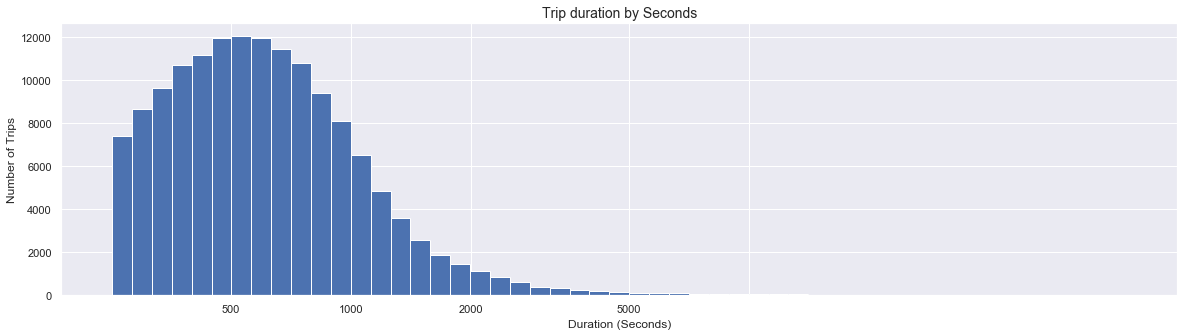

In [1417]:
# Define the figure size
plt.figure(figsize = [20, 5])

# plot the histogram Trip duration by Seconds
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)
plt.hist(data = df_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, 1000, 2000, 5000])

plt.title('Trip duration by Seconds', size=14)
plt.xlabel('Duration (Seconds)', size=12)
plt.ylabel('Number of Trips', size=12)
plt.show()

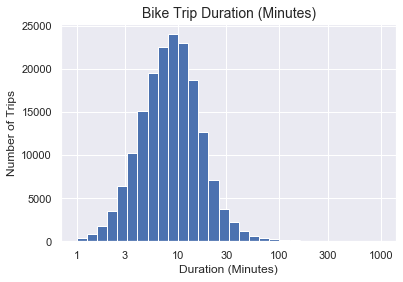

In [1418]:
# plot the histogram of Bike Trip Duration by Minutes

bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks =  [ 1 , 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df_clean , x = 'duration_min' , bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.title('Bike Trip Duration (Minutes)', size=14)
plt.ylabel('Number of Trips', size=12)
plt.xlabel('Duration (Minutes)', size=12);

In [1419]:
df_clean['duration_min'].describe() 

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Most of the rides are short distance, there are within the range of 5mn to 15mn (300 sec to 900sec), with a median of 8.5 and mean of 11.73 minutes. This means that GoBike share system offers an affordable short-term mode of transport. The distribution is slightly skewed to the right, reinforcing the idea that the bikes are generally used for short trips.

### 2. Bike Usage by User Type:

In [1420]:
df_clean['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

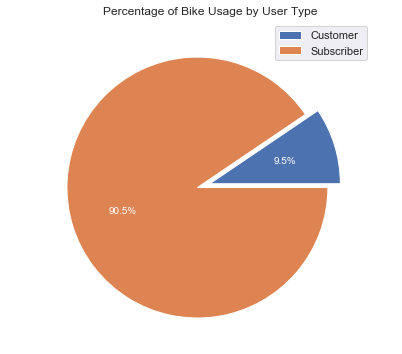

In [1456]:
total_trips = df_clean['duration_sec'].count()
customer_trips = df_clean[df_clean['user_type']=='Customer']['duration_sec'].count() / total_trips
subscriber_trips = df_clean[df_clean['user_type']=='Subscriber']['duration_sec'].count() / total_trips

plt.figure(figsize=(6,6))
plt.pie([customer_trips,subscriber_trips], explode=(0, 0.1), labels=['Customer', 'Subscriber'], 
        autopct='%1.1f%%', startangle=0, textprops={'color':'white'})
plt.title("Percentage of Bike Usage by User Type")
plt.legend()
plt.show()

According to the graph, GoBike users are mostly subscribers with 90.5% of all bikers while customers represent only 9.5%. This means that commuters prefer subscribing to the monthly memberships or annual pass while customers who are tourists in most cases, prefer holding a single-ride or day pass.   

### 3. Number of Bike rides by gender:

In [1422]:
df_clean['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

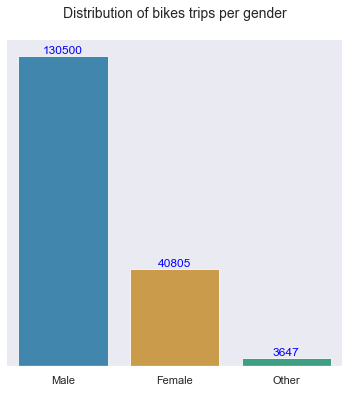

In [1423]:
fig, ax = plt.subplots(figsize = (6,6))

sns.countplot(x = "member_gender", data = df_clean, 
              order = df_clean['member_gender'].value_counts().index,
              palette = sns.color_palette('colorblind'), alpha = 0.8)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+ p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "blue", size = 12)
plt.title('Distribution of bikes trips per gender\n', size=14)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

According to this plot, it is evident that the majority of the rides are made by men with more than 130,000 rides during February 2029 while only 40,000 come from women. This means that GoBike sharing  is predominately operated by males. 

### 4. Bike Usage by group of age:

In [1460]:
df_clean.member_age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

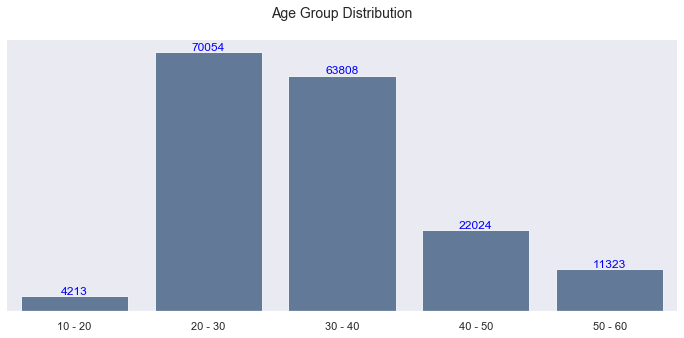

In [1424]:
fig, ax = plt.subplots(figsize = (12,5))
sns.countplot(x = "age_group", data = df_clean,
              color = sns.color_palette('viridis')[1],
              order = ['10 - 20','20 - 30','30 - 40','40 - 50','50 - 60'], alpha=0.8)

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', color = "blue", size=12)

plt.title('Age Group Distribution\n', size=14)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sns.despine(fig, left = True)
plt.xlabel("");

The distribution indicates that the ages of the majority of users range from mid-twenties to mid-thirties, with a median of 32 and mean of 34.19

### 5. Bikes rides during weekdays:

Text(0.5, 1.03, 'Number of Bike rides during Weekdays')

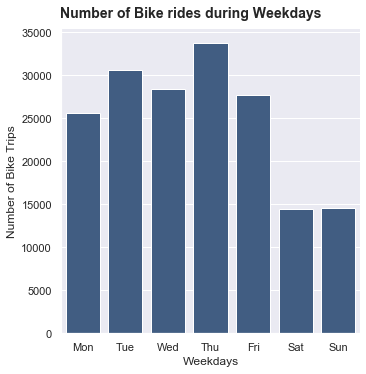

In [1425]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
base_color = sb.color_palette()[0]
    
g = sns.catplot(data = df_clean, x ='weekday', kind = 'count', color = sns.color_palette('viridis')[1], order = weekday)

g.set_axis_labels("Weekdays", "Number of Bike Trips")
g.fig.suptitle('Number of Bike rides during Weekdays', y=1.03, fontsize=14, fontweight='semibold')

The figure shows a consistent use of bike sharing system mostly during business or school days compared to weekend, which means that even in February supposed to be very cold commuters prefer using bike rides for their daily commute to workplaces and schools etc.

### 6. Most Active Station in San Francisco:

In [1463]:
# Display the name of start station
df_clean['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [1464]:
# Subset the dataset by keeping only top 5 start station with high traffics
list_st_station = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                  'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)']
df_Top5 = df_clean.loc[df_clean['start_station_name'].isin(list_st_station)]
df_Top5['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

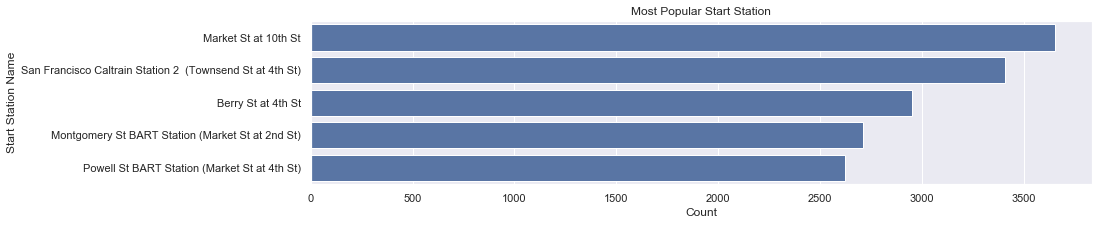

In [1465]:
# Plot the most popular starting station
plt.figure(figsize = [14, 3])
base_color = sb.color_palette()[0]

st_stat_counts = df_Top5['start_station_name'].value_counts()
st_stat_order = st_stat_counts.index

sb.countplot(data = df_Top5, y = 'start_station_name', color = base_color, order = st_stat_order)
plt.xlabel('Count')
plt.ylabel('Start Station Name')
plt.title('Most Popular Start Station');

In [1466]:
df_clean['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
Willow St at Vine St                                            5
21st Ave at International Blvd                                  5
Name: end_station_name, Length: 329, dtype: int64

In [1467]:
# Subset the dataset by keeping only top 5 end station 
list_end_station = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 
                   'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 
                   'San Francisco Caltrain (Townsend St at 4th St)']
df_Top5 = df_clean.loc[df_clean['end_station_name'].isin(list_end_station)]
df_Top5['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

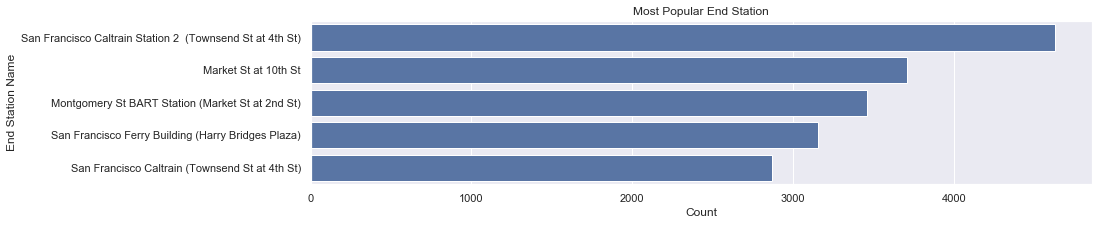

In [1468]:
# Plot the most popular destination
plt.figure(figsize = [14, 3])
base_color = sb.color_palette()[0]

end_stat_counts = df_Top5['end_station_name'].value_counts()
end_stat_order = end_stat_counts.index

sb.countplot(data = df_Top5, y = 'end_station_name', color = base_color, order = end_stat_order)
plt.xlabel('Count')
plt.ylabel('End Station Name')
plt.title('Most Popular End Station');

The most active stations are San Francisco Caltrain Station 2 (Townsend St at 4th St), Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), and also San Francisco Ferry Building (Harry Bridges Plaza) which are connceted to mass public transportation (Train, Bart and Ferry). Commuters have many options to get to the city either by using the train, bus service and also by using the ferry that connects Oakland, Alameda, and Vallejo to the city.

Many subscribers are commuting to the city for work and, therefore, bike rentals will concentrate near major transit stations during the rush hours of 8 AM and 5 PM. Either at 8 AM or 5 PM, a high volume of rides start near key transit stations as well as the outskirts of the city and finish in downtown San Francisco and the Financial District. Notably, a large number of rides begin at San Francisco Caltrain Station 2 and Montgomery St BART Station and the ferry stop. 

# III. Bivariate Exploration of Data:

Bivariate visualizations simultaneously analyzes two variables in order to explore the possibilities of an empirical relationship between them.

In [1434]:
df_clean.head(1)

,bike_id,user_type,member_birth_year,member_age,age_group,member_gender,start_station_name,start_time,end_station_name,end_time,weekday,start_date,end_date,start_hour,end_hour,duration_min,duration_sec
0,4902,Customer,1984,35,30 - 40,Male,Montgomery St BART Station (Market St at 2nd St),17:32:10,Commercial St at Montgomery St,08:01:55,Thu,2019-02-28,2019-03-01,17,08,869.75,52185


### 1. Peak hours of using the Ford GoBike system:

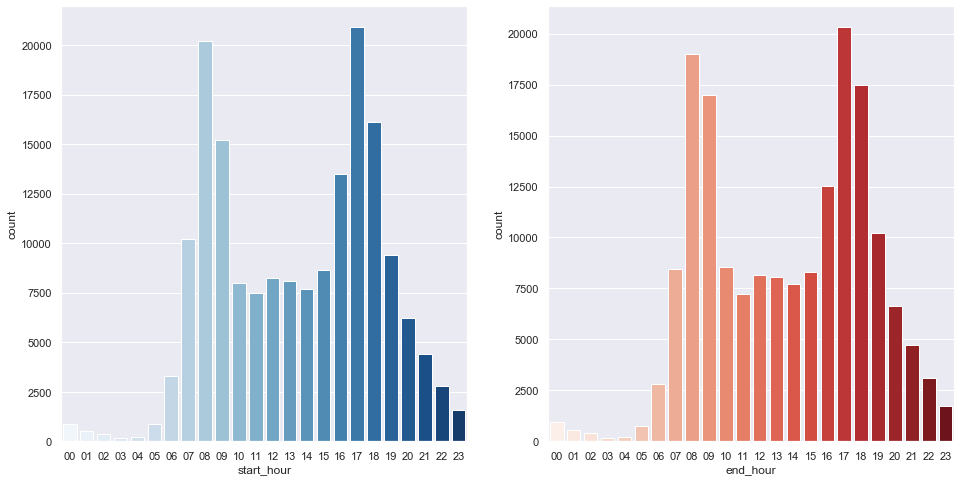

In [1448]:
# bivariate plots of carat vs. cut, color, clarity
plt.figure(figsize = [16, 8])

# plot color vs cut
plt.subplot(1, 2, 1)
sb.countplot(data = df_clean, x ='start_hour', palette = 'Blues')

# plot clarity vs cut
plt.subplot(1, 2, 2)
sb.countplot(data = df_clean, x ='end_hour', palette = 'Reds')

plt.show();

Both distribution show that Ford GoBike share system is busiest during commute hours. The peak hours of using the Ford GoBike system are 8AM and 5PM. 

### 2. Bike Usage by Day of the Week and User Type:

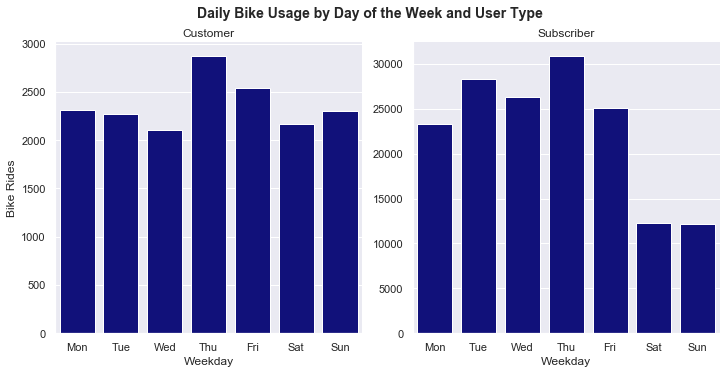

In [1454]:
# plot bar graph
g = sns.catplot(data = df_clean, x ='weekday', col = "user_type", kind = 'count', sharey = False,
            color = 'darkblue', order = weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Daily Bike Usage by Day of the Week and User Type', y=1.03, fontsize = 14, fontweight ='semibold');

The bar chart for Bike Usage by Day of the Week shows that more rides are made on the weekdays than weekends. 
This means that subscribers (90.5% of the bikers) use bike rides mostly on business days for their commute to work or to home while occasional customers (9.5%) use bike rides every day but with a greater usage than subscribers on weekends for their recreational activities.

### 3. Trip Duration by User type:

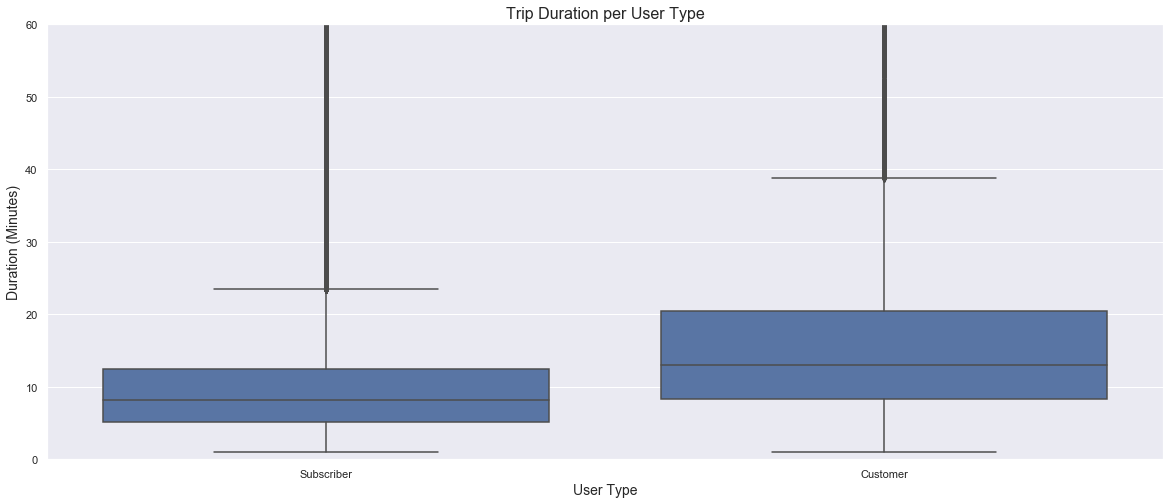

In [1104]:
# bivariate plots of Trip duration against user type
plt.figure(figsize = [20, 8])
base_color = sb.color_palette()[0]

sns.boxplot(data = df_clean, x = 'user_type', y = 'duration_min', order = ['Subscriber', 'Customer'], color = base_color)
plt.title('Trip Duration per User Type', fontsize = 16)
plt.xlabel('User Type', fontsize = 14)
plt.ylabel('Duration (Minutes)', fontsize = 14)
plt.ylim(0, 60)
plt.show();

We conclude that there is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than the ones of subscribers, most probably due to the fact that most Customers are tourists and then have plenty of time to explore the Bay Area and enjoy cycling. However, Subscribers prefer quick rides and then use bikes sharing system only for their commute to and from work/school.

We notice also that there are many outliers because customers forgot to log off from the system after using the bike.

### 4. Relationship between Trip duration and age :

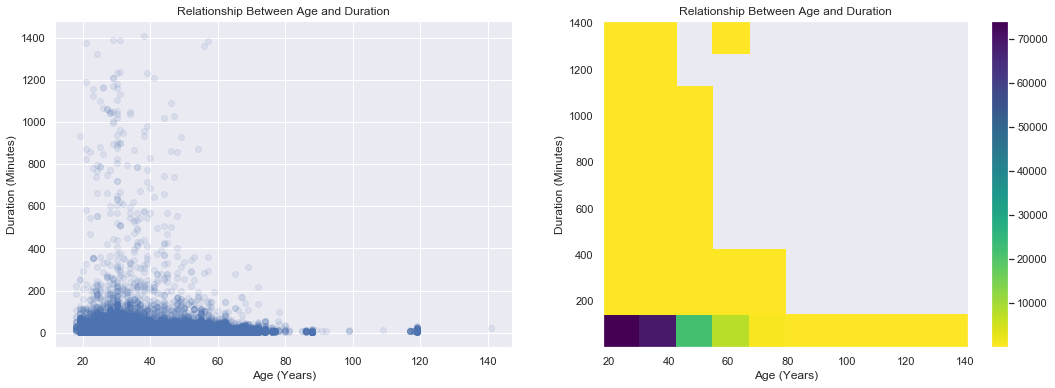

In [1129]:
# plot Relationship between Trip duration and age
plt.figure(figsize = [18, 6])

# PLOT ON LEFT
plt.subplot(1, 2, 1)
sb.regplot(data = df_clean, x = 'member_age', y = 'duration_min', x_jitter = 0.04, scatter_kws = {'alpha':1/10}, fit_reg = False)
plt.title('Relationship Between Age and Duration')
plt.ylabel('Duration (Minutes)')
plt.xlabel('Age (Years)');

# PLOT ON RIGHT
plt.subplot(1, 2, 2)
plt.hist2d(data = df_clean, x = 'member_age', y = 'duration_min', cmin = 0.5, cmap ='viridis_r')
plt.colorbar()
plt.title('Relationship Between Age and Duration')
plt.ylabel('Duration (Minutes)')
plt.xlabel('Age (Years)');

Most frequent users of bikes are aged between 20 and 40. This means that trip Duration is dependent to the age of the member.

# IV. Multivariate Exploration of Data:

Multivariate analysis is based on the multivariate statistics which help to observe and analyzes multiple two or more independent variables simultaneously.

### 1. Relationship Between User Type and its gender:

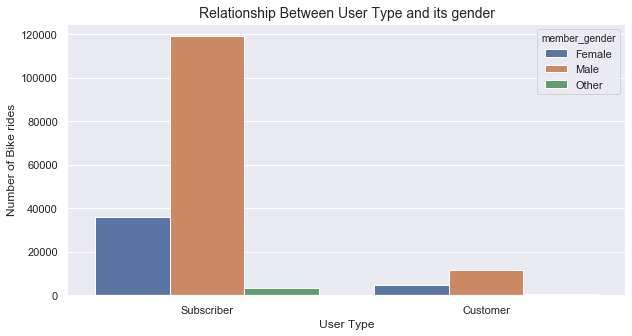

In [1106]:
# plot the Relationship Between User Type and its gender
plt.figure(figsize = [10, 5])

g = sns.countplot(data = df_clean, x ="user_type", hue ="member_gender", order = df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Number of Bike rides')
g.set_title('Relationship Between User Type and its gender', fontsize = 14);

Males are using the Ford GoBike share system more often than females and others. 

### 2. Trip duration per user type and gender:

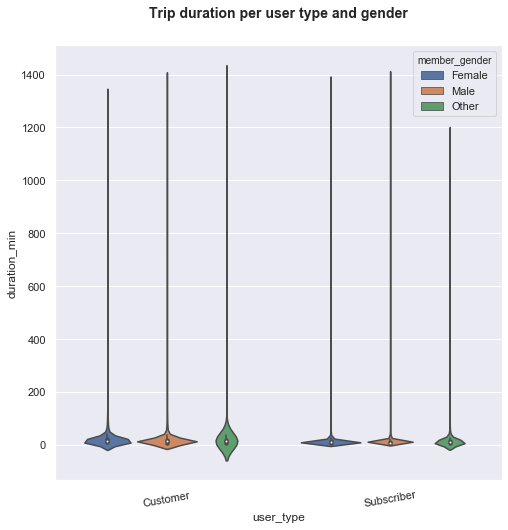

In [1127]:
# Multivaraiate of trip duration vs user type and gender 
plt.figure(figsize = [8, 8])

sb.violinplot(data = df_clean, x='user_type', y="duration_min", hue="member_gender", kind="violin" , innner ='quartile')
plt.xticks (rotation = 10)
g._legend.set_title('Gender');
plt.title('Trip duration per user type and gender', y = 1.05, fontsize =14, fontweight ='semibold');

### 3. Weekly bike rides per user type and gender:

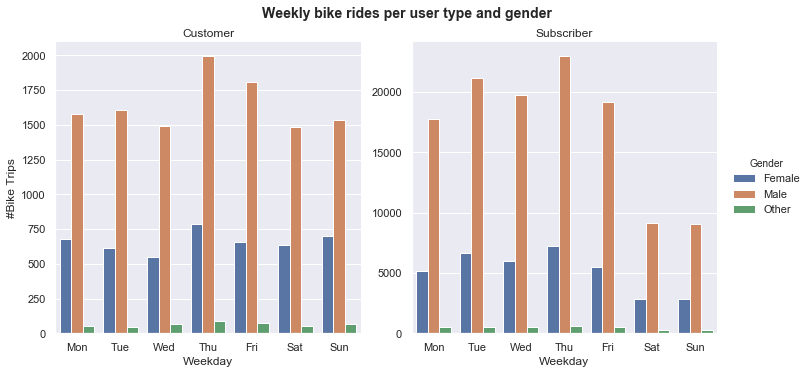

In [1109]:
# plot weekly bike rides per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data = df_clean, x ='weekday', col = "user_type", hue ='member_gender', kind ='count', sharey = False,
                order = weekday)
g.set_axis_labels("Weekday", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Weekly bike rides per user type and gender', y = 1.03, fontsize = 14, fontweight = 'semibold');

Customers either males or females use the Ford GoBike system more often during weekends than business days while subscribers use the system mainly during business days.

### 4. User type usage throught the day and weekday:

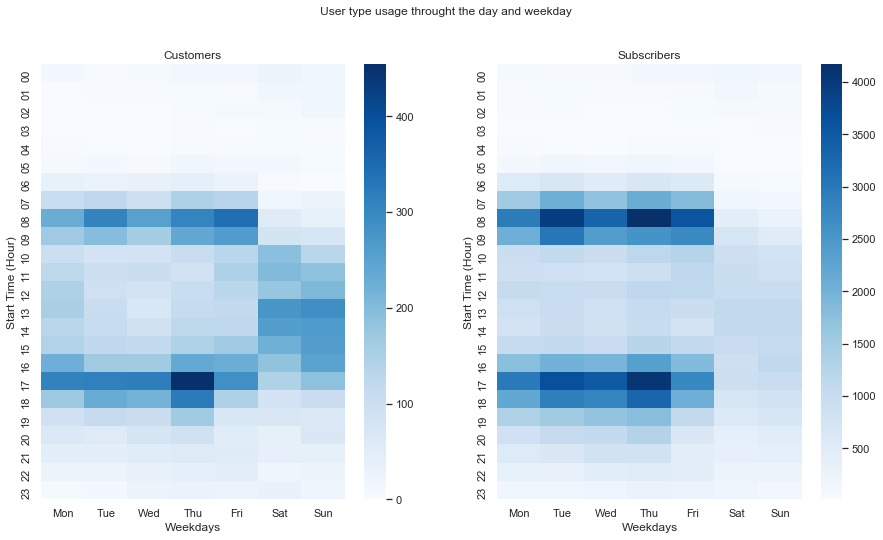

In [1450]:
# setting the order according to the weekday
df_clean['weekday'] = pd.Categorical(df_clean['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)
plt.figure(figsize=(15,8))

plt.suptitle('User type usage throught the day and weekday')

# first heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean[df_clean['user_type'] == 'Customer'].groupby(['start_hour', 'weekday'])['bike_id'].size().reset_index()
df_customer = df_customer.pivot('start_hour', 'weekday', 'bike_id')
sns.heatmap(df_customer, cmap='Blues')

plt.title('Customers', y=1.015)
plt.xlabel('Weekdays')
plt.ylabel('Start Time (Hour)')

# second heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean[df_clean['user_type'] == 'Subscriber'].groupby(['start_hour', 'weekday'])['bike_id'].size().reset_index()
df_subscriber = df_subscriber.pivot('start_hour', 'weekday', 'bike_id')
sns.heatmap(df_subscriber, cmap='Blues')

plt.title('Subscribers', y=1.015)
plt.xlabel('Weekdays')
plt.ylabel('Start Time (Hour)')

plt.tight_layout;


These two heatmap plots shed a lot more light into the fact that customers use the bike sharing system more often on weekends between 10am and 8pm, while subscribers use the bike sharing system mainly on weekdays between 8am and 9am and also between 5pm and 6pm.

### 5. Distribution of bike rides by the top station during weekdays:

In [1112]:
# Subset the dataset by keeping only top 5 start station with high traffics
list_st_station = ['Market St at 10th St', 'San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Berry St at 4th St',
                  'Montgomery St BART Station (Market St at 2nd St)', 'Powell St BART Station (Market St at 4th St)']
df_Top5_start = df_clean.loc[df_clean['start_station_name'].isin(list_st_station)]
df_Top5_start['start_station_name'].value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
Name: start_station_name, dtype: int64

In [1113]:
# Subset the dataset by keeping only top 5 end station 
list_end_station = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)', 'Market St at 10th St', 
                   'Montgomery St BART Station (Market St at 2nd St)', 'San Francisco Ferry Building (Harry Bridges Plaza)', 
                   'San Francisco Caltrain (Townsend St at 4th St)']
df_Top5_end = df_clean.loc[df_clean['end_station_name'].isin(list_end_station)]
df_Top5_end['end_station_name'].value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
Name: end_station_name, dtype: int64

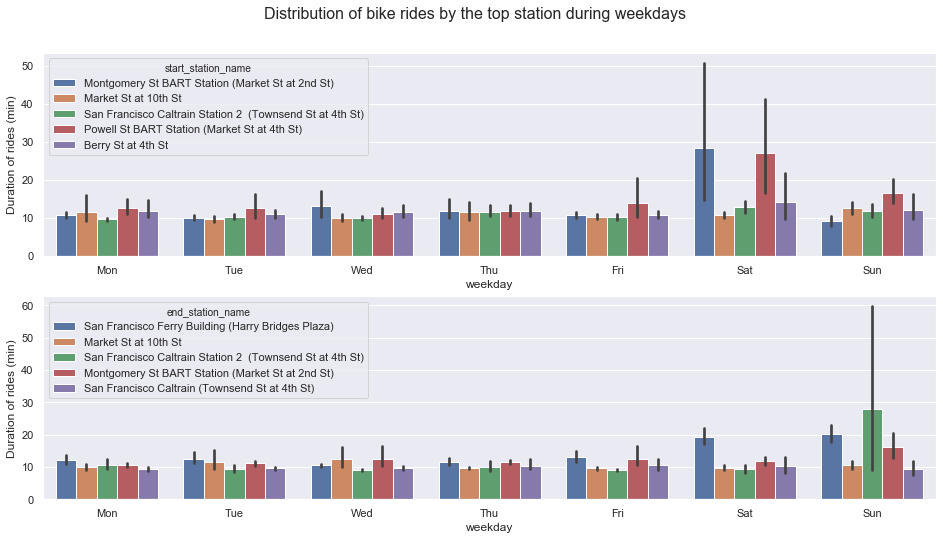

In [1126]:
# Multivariate plot of top start stations and top end stations vs duration and weekdays
plt.figure(figsize = [16, 8])
base_color = sb.color_palette()[2]

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories = weekday)

# plot top start stations vs duration and weekdays
plt.subplot(2, 1, 1)
df_Top5_start['weekday'] = df_Top5_start['weekday'].astype(weekdaycat)
sb.barplot(data = df_Top5_start, x ='weekday', y ='duration_min', hue ='start_station_name')
plt.xlabel('weekday', fontsize = 12)
plt.ylabel('Duration of rides (min)', fontsize = 12)

# plot top end stations vs duration and weekdays
plt.subplot(2, 1, 2)
df_Top5_end['weekday'] = df_Top5_end['weekday'].astype(weekdaycat)
sb.barplot(data = df_Top5_end, x ='weekday', y ='duration_min', hue ='end_station_name')
plt.xlabel('weekday', fontsize=12)
plt.ylabel('Duration of rides (min)', fontsize=12)

plt.subplots_adjust(top = 0.9)
plt.suptitle('Distribution of bike rides by the top station during weekdays', fontsize=16);

The two plots displays more information about the relationship between stations, duration of rides and the number of rides during the day of week. Customers might be tourists who like to ride a bike during the weekend and in the summer. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays, the number of trips gradually increases on weekends.

## Conclusion:

To summarize our findings:

- Most of the rides are short distance, within a range of 5mn to 15mn (300 sec to 900sec), with a median of 8.5 and mean of 11.73 minutes. This means that GoBike share system offers an affordable short-term mode of transport. The distribution is slightly skewed to the right, reinforcing the idea that the bikes are generally used for short trips.

- Customers trips are usually longer than the ones of subscribers, most probably due to the fact that most Customers are tourists and then have plenty of time to explore the Bay Area and enjoy cycling. However, Subscribers prefer quick rides and then use bikes sharing system only for their commute to and from work/school.

- GoBike users are mostly subscribers with 90.5% of all bikers while customers represent only 9.5%. This means that commuters prefer subscribing to the monthly memberships or annual pass while customers who are tourists in most cases, prefer holding a single-ride or day pass.

- We have found that male users outnumber the female users. The majority of the rides are made by men with more than 130,000 rides during February 2029 while only 40,000 come from women. This means that GoBike sharing is predominately operated by males.

- The ages of the majority of users range from mid-twenties to mid-thirties, with a median of 32 and mean of 34.19

- There is a consistent use of bike sharing system mostly during business or school days compared to weekend, which means that even in February supposed to be very cold commuters prefer using bike rides for their daily commute to workplaces and schools etc.

- The most active stations are San Francisco Caltrain Station 2 (Townsend St at 4th St), Market St at 10th St, Montgomery St BART Station (Market St at 2nd St), and also San Francisco Ferry Building (Harry Bridges Plaza) which are connceted to mass public transportation (Train, Bart and Ferry). Commuters have many options to get to the city either by using the train, bus service and also by using the ferry that connects Oakland, Alameda, and Vallejo to the city. While, many subscribers are commuting to the city for work and, therefore, bike rentals will concentrate near major transit stations during the rush hours of 8 AM and 5 PM. Either at 8 AM or 5 PM, a high volume of rides start near key transit stations as well as the outskirts of the city and finish in downtown San Francisco and the Financial District. Notably, a large number of rides begin at San Francisco Caltrain Station 2 and Montgomery St BART Station and the ferry stop.

- More rides are made on the weekdays than weekends. This means that subscribers (90.5% of the bikers) use bike rides mostly on business days for their commute to work or to home while occasional customers (9.5%) use bike rides every day but with a greater usage than subscribers on weekends for their recreational activities.

- Customers might be tourists who like to ride a bike during the weekend. Also, the number of trips increases in the tourist attractions like Ferry building and Embarcadero (close to piers). On the other hand, subscribers might be commuters. The trips in subscribers increase during the weekdays, the number of trips gradually increases on weekends. We noticed also that there are many outliers because customers forgot to log off from the system after using the bike.

**Proposal for the next step:**

One of the limitations to draw perfect conclusion is that the dataset contains only data from February 2019 and also there are some outliers due to the miss-use of the Ford GoBike System. In addition, the database have some quality issues that have been cleaned which leads that many data were excluded from our analysis. Finally, the dataset needs to be updated with more data of other months of the year in order to investigate it deeper with new features and draws new findings.